<a href="https://colab.research.google.com/github/antrecord/AV_Final_project/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2%D0%BE%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, preprocessing, ensemble, metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Подключаемся к диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Читаем датасет
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/water_potability.csv')

In [ ]:
# Выводим первые строки датасета
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Проверим, сколько пропущеных значений в датасете
np.count_nonzero(dataset.isnull().sum(axis= 1).values)

1265

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Для 'ph'
ph_data = dataset[dataset['ph'].notna()]
X = ph_data.drop(columns=['ph'])
y = ph_data['ph']

model = RandomForestRegressor()
model.fit(X, y)

missing_ph = dataset[dataset['ph'].isna()]
dataset.loc[dataset['ph'].isna(), 'ph'] = model.predict(missing_ph.drop(columns=['ph']))

# Для 'Sulfate'
Sulfate_data = dataset[dataset['Sulfate'].notna()]
X = Sulfate_data.drop(columns=['Sulfate'])
y = Sulfate_data['Sulfate']

model = RandomForestRegressor()
model.fit(X, y)

missing_Sulfate = dataset[dataset['Sulfate'].isna()]
dataset.loc[dataset['Sulfate'].isna(), 'Sulfate'] = model.predict(missing_Sulfate.drop(columns=['Sulfate']))

# Для 'Trihalomethanes'
Trihalomethanes_data = dataset[dataset['Trihalomethanes'].notna()]
X = Trihalomethanes_data.drop(columns=['Trihalomethanes'])
y = Trihalomethanes_data['Trihalomethanes']

model = RandomForestRegressor()
model.fit(X, y)

missing_Trihalomethanes = dataset[dataset['Trihalomethanes'].isna()]
dataset.loc[dataset['Trihalomethanes'].isna(), 'Trihalomethanes'] = model.predict(missing_Trihalomethanes.drop(columns=['Trihalomethanes']))

In [ ]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.466709,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,322.000049,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,315.148200,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,345.806665,392.449580,19.903225,72.843334,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,321.032157,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.366485,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
# Проверим, сколько пропущеных значений в датасете
np.count_nonzero(dataset.isnull().sum(axis= 1).values)

0

In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.081302,196.369496,22014.092526,7.122277,333.850097,426.205111,14.284970,66.411342,3.966786,0.390110
std,1.484590,32.879761,8768.570828,1.583085,37.040470,80.824064,3.308162,15.787629,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.245408,176.850538,15666.690297,6.127421,314.078838,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.048690,196.967627,20927.833607,7.130299,333.204547,421.884968,14.218338,66.603114,3.955028,0.000000
75%,7.902943,216.667456,27332.762127,8.114887,353.495851,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

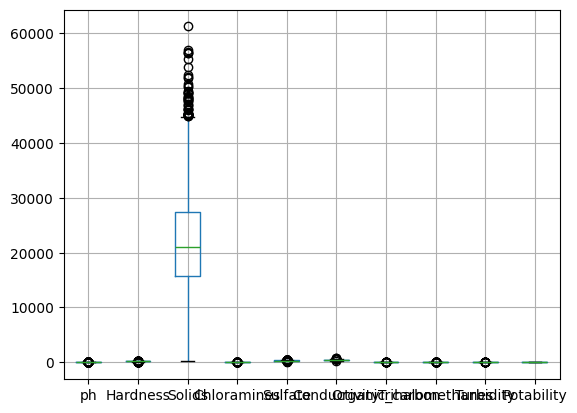

In [ ]:
dataset.boxplot()

In [ ]:
# Функция для удаления выбросов по IQR для признаков
def remove_outliers_iqr(df, feature):
    data = df[feature].values
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return df.drop(df[(df[feature] > upper) | (df[feature] < lower)].index)

new_df_without_outliers = dataset
features_to_check = list(dataset.corr()['Potability'][(dataset.corr()['Potability'] != 1)].index) # Берём признаки (кроме целевой переменной)
for feature in features_to_check:
    # Вызов функции для признаков
    new_df_without_outliers = remove_outliers_iqr(new_df_without_outliers, feature)
new_df_without_outliers

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.466709,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,315.148200,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,345.806665,392.449580,19.903225,72.843334,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,321.032157,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.366485,402.883113,11.168946,77.488213,4.708658,1


<Axes: >

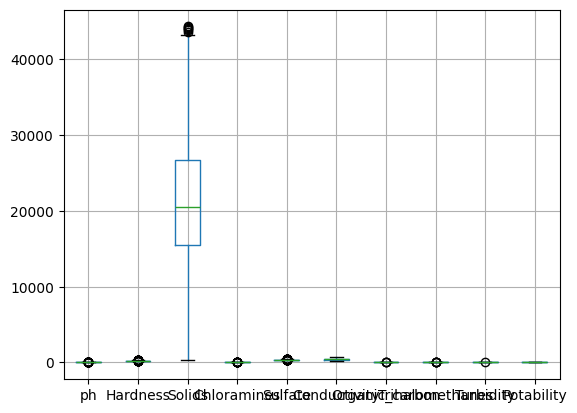

In [ ]:
new_df_without_outliers.boxplot()

In [ ]:
dataset = new_df_without_outliers.copy()

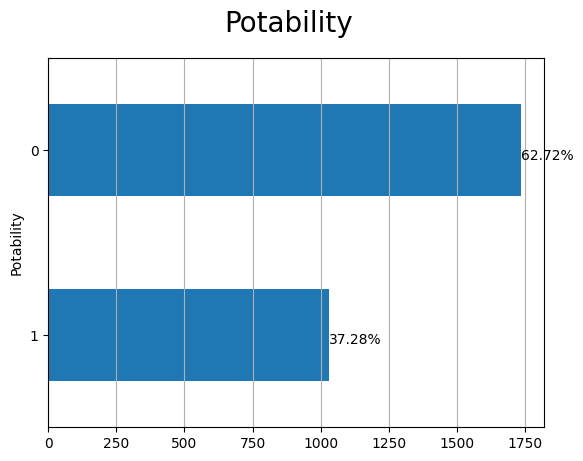

In [ ]:
y_name = "Potability" # Целевая переменная
# Считаем количество значений и сортируем их
ax = dataset[y_name].value_counts().sort_values().plot(kind="barh")

totals= [] # Высота столбцов
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals) # Суммарная высота
# Выводим Названия классов и процентное соотношение
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x") # Выводи мсетку по x
plt.suptitle(y_name, fontsize=20) # Название графика
plt.show()

In [ ]:
X = dataset.drop('Potability', axis=1)
y = dataset['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=159)

In [ ]:
ros = RandomOverSampler(random_state=159)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
smote = SMOTE(random_state=159)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
adasyn = ADASYN(random_state=159)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [ ]:
smote_tomek = SMOTETomek(random_state=159)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [ ]:
smote_enn = SMOTEENN(random_state=159)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler
scaler = StandardScaler()

# Применяем нормализацию ко всем столбцам
X_train_norm = pd.DataFrame(scaler.fit_transform(X_resampled), columns=dataset.drop(y_name, axis = 1).columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=dataset.drop(y_name, axis = 1).columns)
y_train_norm = y_resampled
y_test_norm = y_test

X_train_norm.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.298884,0.430700,1.209751,-0.523249,-0.713410,0.430432,0.780698,-1.694788,-0.326437
1,-0.878244,1.007540,-1.198358,1.776953,0.929049,-0.947352,-0.223226,0.255687,0.012741
2,-0.110826,0.110179,1.013601,0.585279,0.457396,0.622291,1.768201,-0.103210,-1.233775
3,-0.730129,-1.332525,-0.166882,-0.218580,0.612295,-0.660642,-0.283477,0.939865,0.951758
4,0.069944,1.291216,-1.385400,0.333999,-0.413038,-1.337475,-1.895129,0.927020,-0.077549


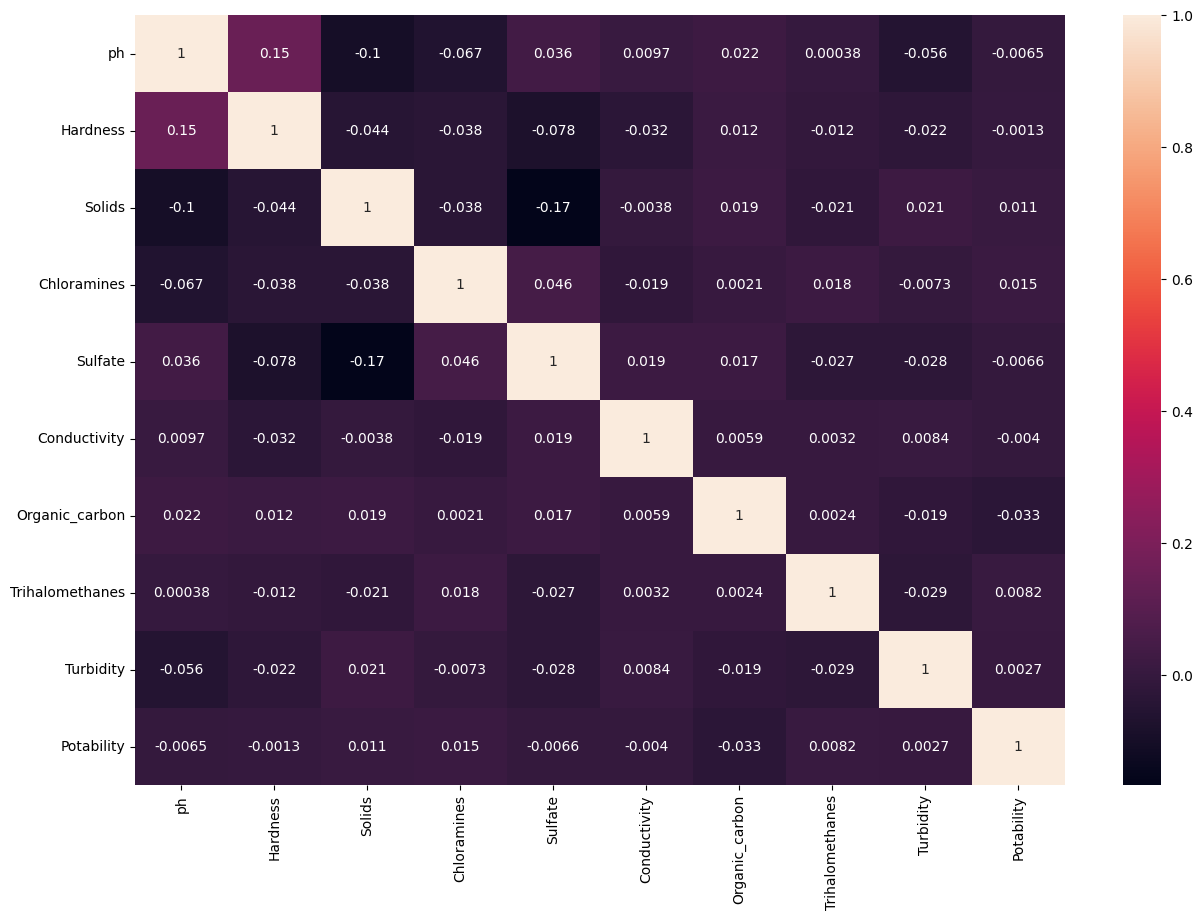

In [ ]:
# Матрица корреляции

plt.figure(figsize=(15, 10)).add_subplot(1,1,1)
sns.heatmap(dataset.corr(), annot = True)
plt.show()

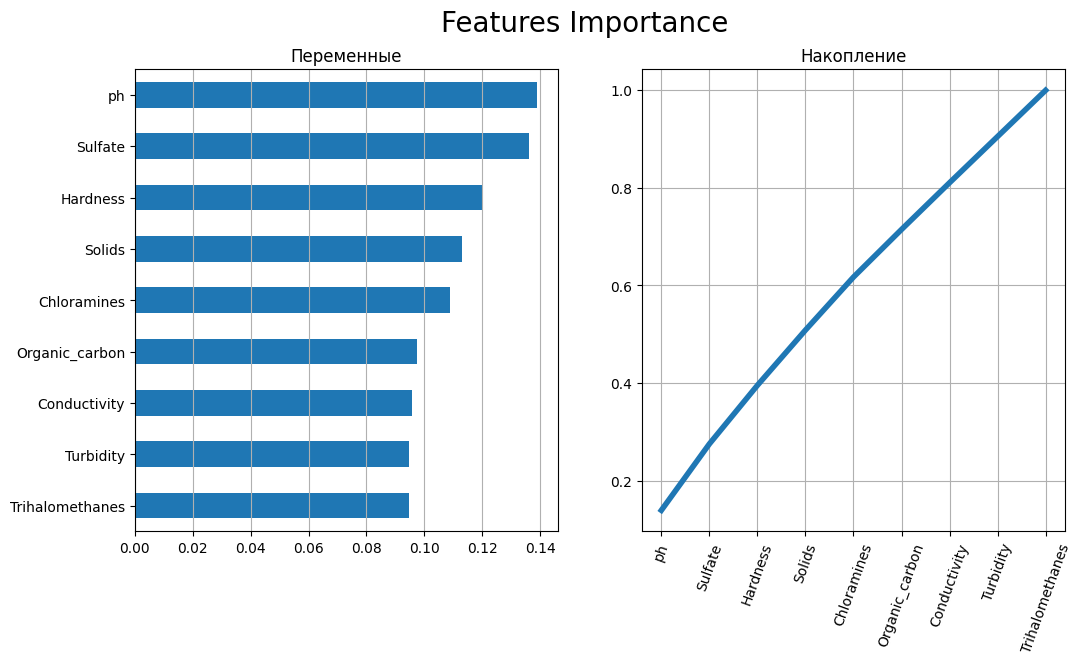

In [ ]:
# Оценим важность каждого столбца
X = X_train_norm.values
y = y_train_norm.values
feature_names = X_train_norm.columns.tolist() # Имена столбцов в датасете.
# Важность параметров
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=159)
model.fit(X,y)
importances = model.feature_importances_ # Это оценка, присваиваемая функциям модели машинного обучения,которая определяет, насколько «важной» является функция для прогноза модели.
# Создаём датафрейм
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")


# Графики
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(12,6),dpi=100) # Распаковываем  кортеж в переменные fig и ax.
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('Переменные') # Подпишем график
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('Накопление') # Подпишем график
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both') # Настроим сетку.

plt.show()

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=159)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(random_state=159, gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=159, shuffle=True)
  cv_results = cross_val_score(model, X_train_norm, y_train_norm, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.496364 (0.023468)
LDA: 0.496727 (0.023010)
KNN: 0.647273 (0.020699)
CART: 0.737818 (0.029740)
NB: 0.554909 (0.034658)
SVC: 0.676000 (0.024036)


In [ ]:
# Выберем для модели CART гиперпараметры
tree = DecisionTreeClassifier(random_state=159)
# Задаем диапазоны гиперпараметров для подбора
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}
grid_model = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy', cv = 5)
grid_model.fit(X_train_norm, y_train_norm)
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

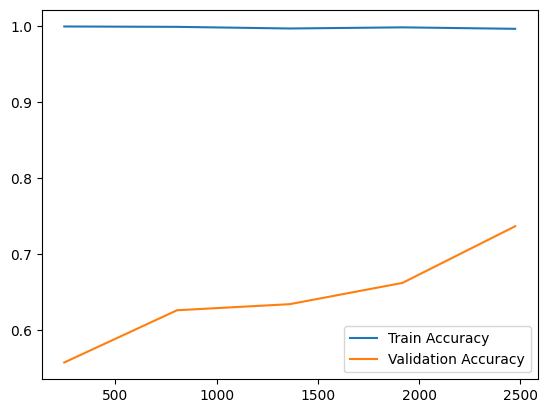

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    grid_model.best_estimator_,
    X_train_norm,
    y_train_norm,
    cv=kfold,
    scoring='accuracy',
    random_state=159
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.legend()
plt.show()

y_pred = grid_model.best_estimator_.predict(X_test_norm)

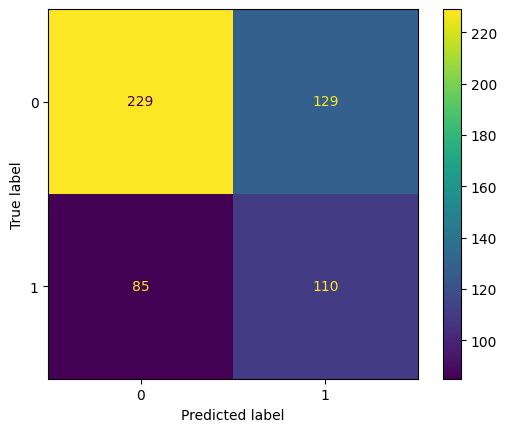

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       358
           1       0.46      0.56      0.51       195

    accuracy                           0.61       553
   macro avg       0.59      0.60      0.59       553
weighted avg       0.63      0.61      0.62       553



In [ ]:
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test_norm, y_pred, labels = [0,1])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()
matrix = classification_report(y_test_norm, y_pred)
print(matrix)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Настройка модели с параметрами, минимизирующими переобучение
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,                # Ограничение глубины дерева
    min_samples_split=10,        # Минимальное количество образцов для разбиения узла
    min_samples_leaf=5,          # Минимальное количество образцов в листе
    random_state=159
)

# Обучение модели
model.fit(X_train_norm, y_train_norm)

# Оценка модели на тестовой выборке
y_pred = model.predict(X_test_norm)

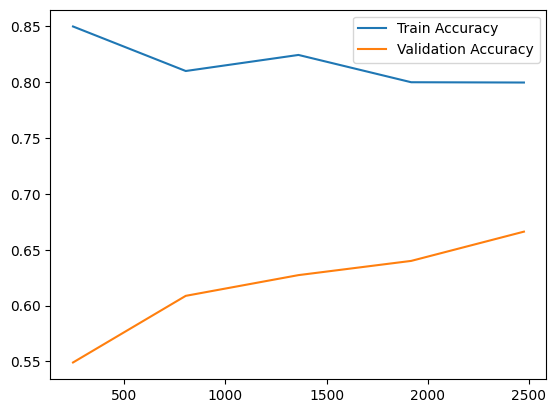

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train_norm,
    y_train_norm,
    cv=kfold,
    scoring='accuracy',
    random_state=159
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Accuracy')
plt.legend()
plt.show()

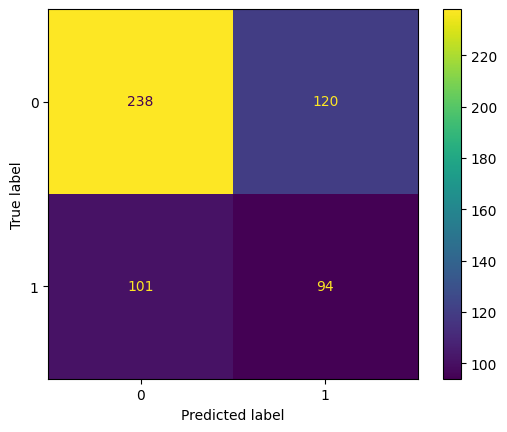

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       358
           1       0.44      0.48      0.46       195

    accuracy                           0.60       553
   macro avg       0.57      0.57      0.57       553
weighted avg       0.61      0.60      0.60       553



In [ ]:
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test_norm, y_pred, labels = [0,1])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()
matrix = classification_report(y_test_norm, y_pred)
print(matrix)

In [ ]:
# Выберем для модели SVC параметры kernel и C
svc = SVC()
grid_model = GridSearchCV(svc, {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 2]}, cv = 5)
grid_model.fit(X_train_norm, y_train_norm)
grid_model.best_params_

{'C': 2, 'kernel': 'rbf'}

In [ ]:
# Обучим модель на лучших параметрах и на обучающем наборе данных
svc = SVC(kernel=grid_model.best_params_['kernel'], C=grid_model.best_params_['C'], probability=True, random_state=159)
svc.fit(X_train_norm, y_train_norm)
y_pred = svc.predict(X_test_norm)

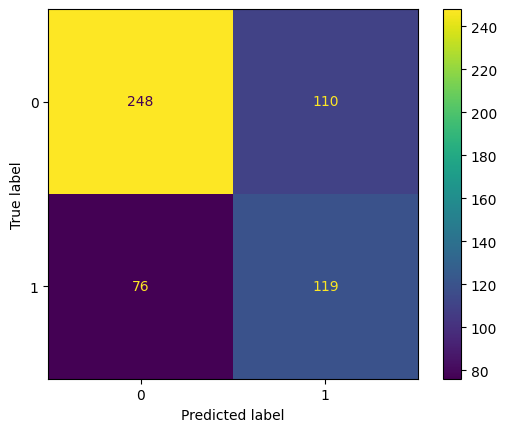

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       358
           1       0.52      0.61      0.56       195

    accuracy                           0.66       553
   macro avg       0.64      0.65      0.64       553
weighted avg       0.68      0.66      0.67       553



In [ ]:
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test_norm, y_pred, labels = [0,1])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()
matrix = classification_report(y_test_norm, y_pred)
print(matrix)

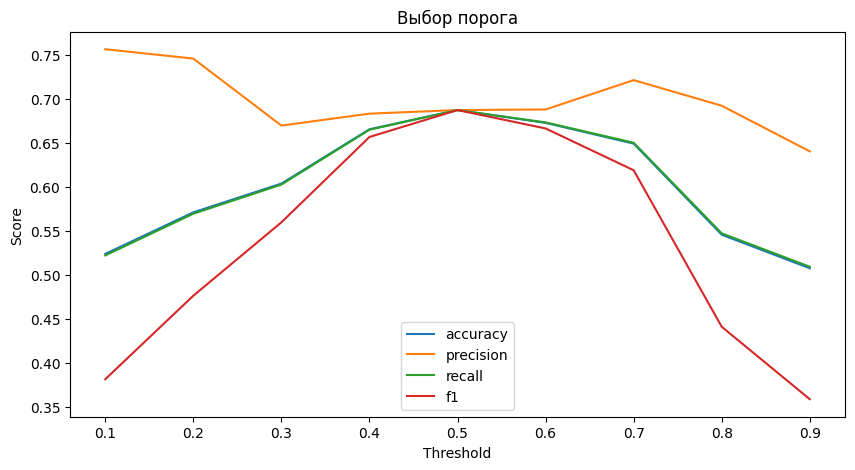

In [ ]:
# Построим графики значений отсечки для каждой метрики
# Значения метрик для различных пороговых значений вхождения в класс
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train_norm, y_train_norm, test_size=0.2, random_state=159)
predicted_prob = svc.fit(XX_train, yy_train).predict_proba(XX_test)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (predicted_prob > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='macro', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='macro'))

# Строим графики
dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Выбор порога")
dtf_scores.plot(ax=ax)

plt.show()

In [ ]:
# Обучаем модель
model = SVC(kernel=grid_model.best_params_['kernel'], C=grid_model.best_params_['C'], probability=True, random_state=159)  # Используем probability=True для доступа к вероятностям
model.fit(X_train_norm, y_train_norm)

# Получаем вероятности принадлежности к классам
y_pred = model.predict_proba(X_test_norm)

# Задаем порог равный 0.5
threshold = 0.5
predictions = (y_pred[:, 1] >= threshold).astype(int)

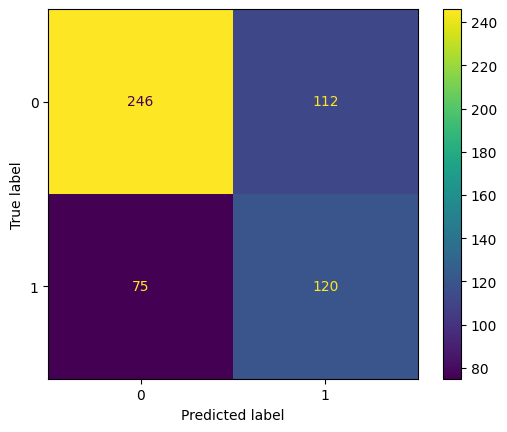

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       358
           1       0.52      0.62      0.56       195

    accuracy                           0.66       553
   macro avg       0.64      0.65      0.64       553
weighted avg       0.68      0.66      0.67       553



In [ ]:
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test_norm, predictions, labels = [0,1])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()
matrix = classification_report(y_test_norm, predictions)
print(matrix)